In [1]:
import pandas as pd

# Chargement des données
data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")


In [2]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Suppression des colonnes inutile pour la prédiction
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [4]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Encodage des colonnes catégories Geography et Gende avec one-hot
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)


gender(True ou 1: homme; False ou 0: femme), 

In [6]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [7]:
#conversion des colonnes boolean en entier
data['Geography_Germany'] = data['Geography_Germany'].astype(int)
data['Geography_Spain'] = data['Geography_Spain'].astype(int)
data['Gender_Male'] = data['Gender_Male'].astype(int)

In [8]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
print(data.dtypes)


CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int64
Geography_Spain        int64
Gender_Male            int64
dtype: object


In [10]:
# Vérifier si des colonnes contiennent des valeurs manquantes
print(data.isnull().sum())


CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64


In [11]:
#standardisation des variables continues
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes à standardiser
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Initialisation du StandardScaler
scaler = StandardScaler()

# Application du scaler uniquement sur les colonnes continues
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [12]:
#vérification des nouvelles valeurs
print(data[columns_to_scale].head())

   CreditScore       Age   Balance  EstimatedSalary
0    -0.326221  0.293517 -1.225848         0.021886
1    -0.440036  0.198164  0.117350         0.216534
2    -1.536794  0.293517  1.333053         0.240687
3     0.501521  0.007457 -1.225848        -0.108918
4     2.063884  0.388871  0.785728        -0.365276


In [13]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,1,0


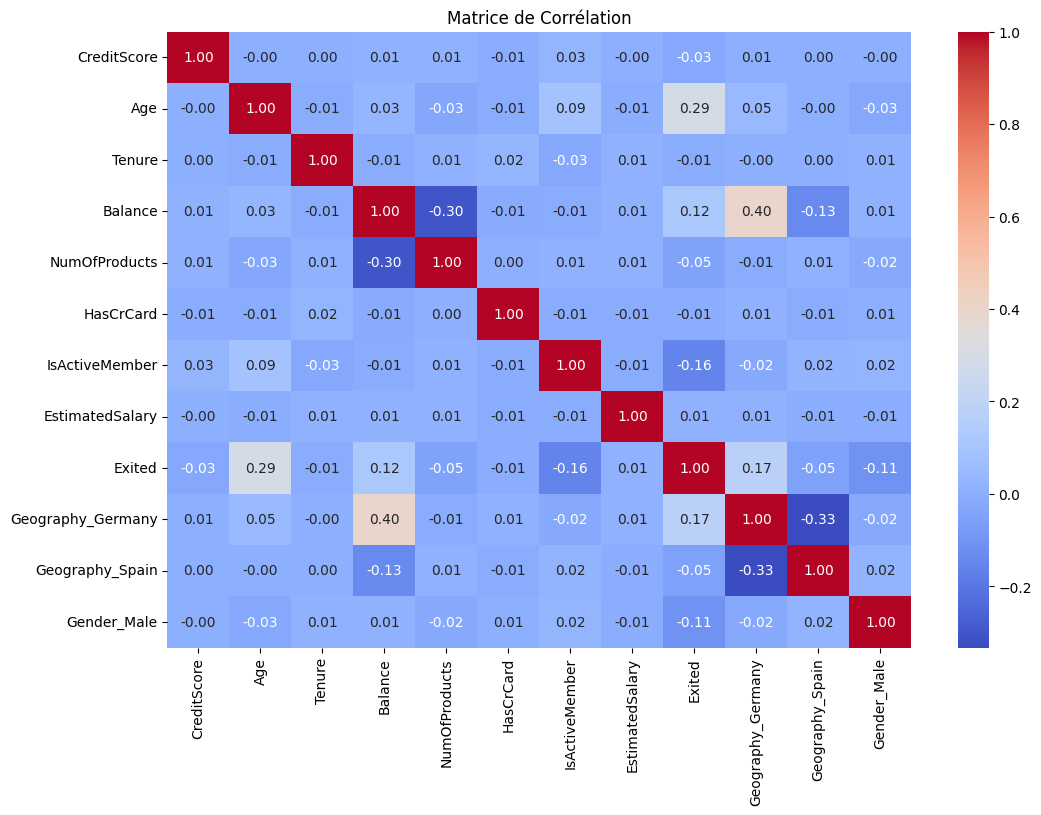

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


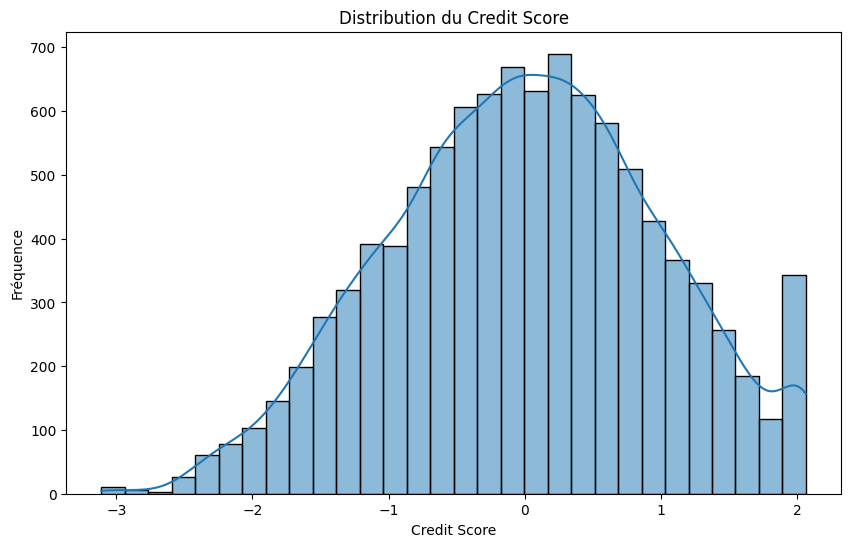

In [15]:
#distribution de la variable Creditscore
plt.figure(figsize=(10, 6))
sns.histplot(data['CreditScore'], bins=30, kde=True)
plt.title('Distribution du Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Fréquence')
plt.show()


In [16]:
#séparation des caracteriqtique(X) et de la cible (y)
X = data.drop('Exited', axis=1)  
y = data['Exited']  


In [17]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


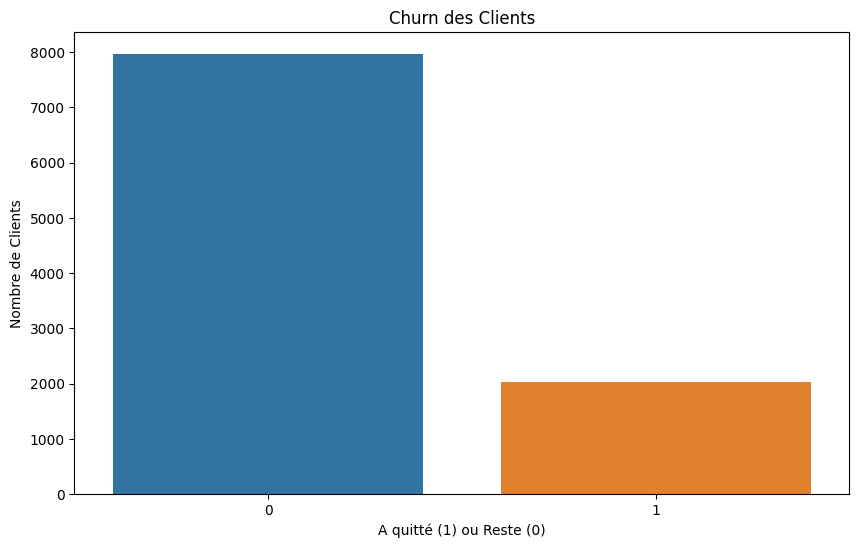

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Exited', data=data)
plt.title('Churn des Clients')
plt.xlabel('A quitté (1) ou Reste (0)')
plt.ylabel('Nombre de Clients')
plt.show()


In [19]:
print(data['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Sous-échantillonnage de la classe majoritaire
rus = RandomUnderSampler(sampling_strategy=0.5)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Vérification des distributions
print("Distribution après sous-échantillonnage :")
print(y_resampled.value_counts())

# Calculer le nombre d'échantillons de la classe majoritaire
major_class_count = y_resampled.value_counts().max()

# Définir la stratégie d'échantillonnage en tant que fraction
sampling_strategy = major_class_count / len(y_resampled)

# Suréchantillonnage de la classe minoritaire
smote = SMOTE(sampling_strategy=sampling_strategy)
X_balanced, y_balanced = smote.fit_resample(X_resampled, y_resampled)

# Vérification des nouvelles dimensions
print("Distribution après rééchantillonnage :")
print(y_balanced.value_counts())


Distribution après sous-échantillonnage :
Exited
0    4074
1    2037
Name: count, dtype: int64
Distribution après rééchantillonnage :
Exited
0    4074
1    2716
Name: count, dtype: int64


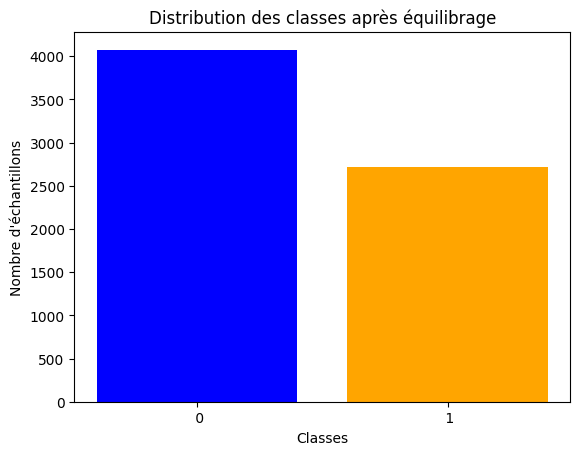

In [21]:
import matplotlib.pyplot as plt

y_balanced = [0] * 4074 + [1] * 2716  

# Compte les occurrences de chaque classe
class_distribution = pd.Series(y_balanced).value_counts()

# Création du graphique à barres
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'orange'])
plt.xticks([0, 1], [' 0', ' 1']) 
plt.title("Distribution des classes après équilibrage")
plt.xlabel("Classes")
plt.ylabel("Nombre d'échantillons")
plt.show()


In [22]:
#separation des données d'entrainement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [23]:
#regression logistique modéle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred_logistic))


              precision    recall  f1-score   support

           0       0.73      0.83      0.77       794
           1       0.70      0.56      0.62       564

    accuracy                           0.72      1358
   macro avg       0.71      0.69      0.70      1358
weighted avg       0.71      0.72      0.71      1358



In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


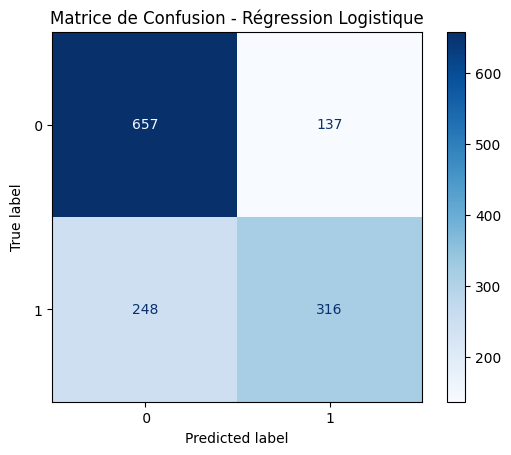

In [25]:
# Matrice de confusion pour le modèle de régression logistique
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=[' 0', '1'])
disp_logistic.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion - Régression Logistique')
plt.show()


In [26]:
#forêt aléatoire modéle
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       794
           1       0.81      0.69      0.74       564

    accuracy                           0.80      1358
   macro avg       0.80      0.79      0.79      1358
weighted avg       0.80      0.80      0.80      1358



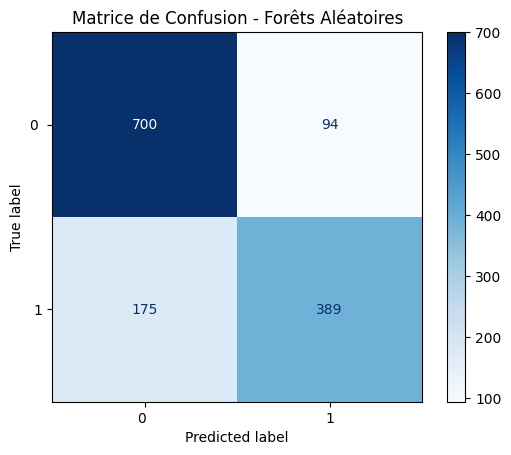

In [27]:
# Matrice de confusion pour le modèle des forêts aléatoires
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['0 ', '1'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion - Forêts Aléatoires')
plt.show()


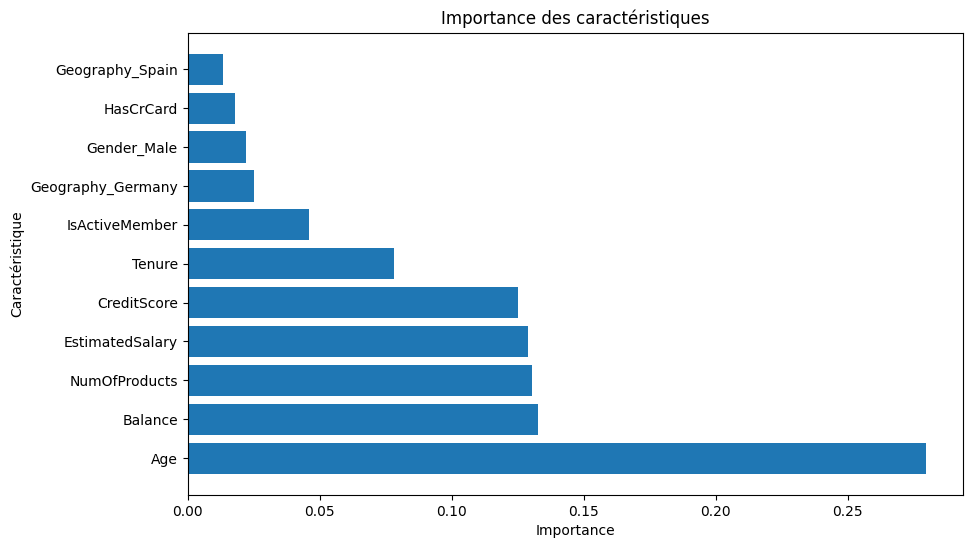

In [28]:

# Importance des caractéristiques
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Tracer l'importance des caractéristiques
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques')
plt.show()

In [29]:
# Gradient Boosting modéle
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       794
           1       0.81      0.68      0.74       564

    accuracy                           0.80      1358
   macro avg       0.80      0.78      0.79      1358
weighted avg       0.80      0.80      0.80      1358



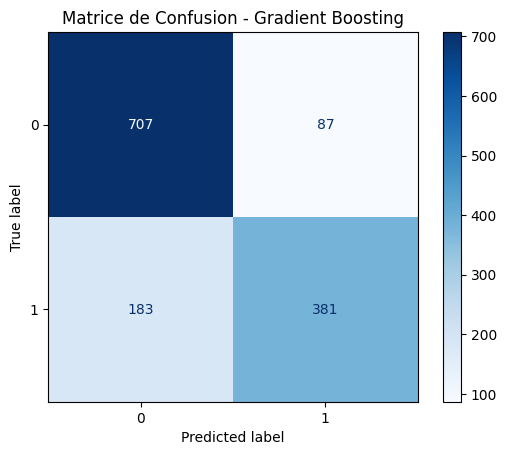

In [30]:
# Matrice de confusion pour le modèle de gradient boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['0', '1'])
disp_gb.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion - Gradient Boosting')
plt.show()


In [31]:
def preprocess_data(data):
    # Encodage des colonnes catégorielles
    data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

    # Ajout des colonnes manquantes
    for col in ['Geography_Germany', 'Geography_Spain', 'Gender_Male']:
        if col not in data_encoded.columns:
            data_encoded[col] = 0

    # Réarranger les colonnes pour correspondre à celles du modèle
    data_encoded = data_encoded[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                                 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']]
    
    return data_encoded


In [32]:
# Nouvelles données non encodées
new_data = pd.DataFrame({
    'CreditScore': [480],
    'Age': [58],
    'Tenure': [3],
    'Balance': [120000],
    'NumOfProducts': [2],
    'HasCrCard': [0],
    'IsActiveMember': [0],
    'EstimatedSalary': [45000],
    'Geography': ['France'],  
    'Gender': ['Female']          
})

# Prétraitement des données
new_data_preprocessed = preprocess_data(new_data)

# Prédiction avec le modèle
prediction = rf_model.predict(new_data_preprocessed)

# Conversion des prédictions en texte lisible
resultat = ['Exited' if pred == 1 else 'Non Exited' for pred in prediction]

# Afficher la prédiction finale
print("Prédiction :", resultat)


Prédiction : ['Exited']


In [33]:
import joblib

# Enregistrer le modèle Random Forest
joblib.dump(rf_model, 'modele_rf.pkl')


['modele_rf.pkl']

In [34]:
model = joblib.load('modele_rf.pkl')
